In [1]:
from PIL import Image

base_img = Image.open("../unsplash_temp.png")
print(base_img.format)

JPEG


In [2]:
from PIL import ImageDraw, ImageFont

# Resize image
size = 1000, 600
base_img.thumbnail(size, Image.LANCZOS)

base_img.save('../devnote.png')

# optional parameters like optimize and quality
base_img.save('../optimized.png', optimize=True, quality=50)

In [3]:
# Concatenating an image
optimized_img = Image.open('../optimized.png')

# Add in icons
# Using a glob
import glob
from os.path import join, dirname, abspath

dst = Image.new('RGBA', (optimized_img.width, optimized_img.height))
dst.paste(optimized_img, (0, 0))

icons_dir = join(dirname(abspath("__file__")), '../icons')
icons = glob.glob(f"{icons_dir}/*")
for i, icon_path in enumerate(icons):
	icon = Image.open(icon_path)
	# @see https://stackoverflow.com/questions/5324647/how-to-merge-a-transparent-png-image-with-another-image-using-pil
	dst.paste(icon, (60 + (i * icon.width) + (i * 20), optimized_img.height - 100 - icon.height), icon)

draw = ImageDraw.Draw(dst)

import os

# font = ImageFont.truetype(<font-file>, <font-size>)
font = ImageFont.truetype(os.path.join('../fonts/OpenSans-Bold.ttf'), 58)
# draw.text((x, y),"Sample Text",(r,g,b))
import textwrap
text = "Sample Text that is too long but let us write a bunch anyway"
print(dst.width)
max_text_width = 25
wrapped_text = textwrap.wrap(text, width=max_text_width)
for i, line in enumerate(wrapped_text):
		# draw.text((0, height - (i * 20)), line, (0, 0, 0), font=font)
		draw.text((60, 100 + (i * 80)),line,(255,255,255),font=font)

dst.save('../concat.png')

900


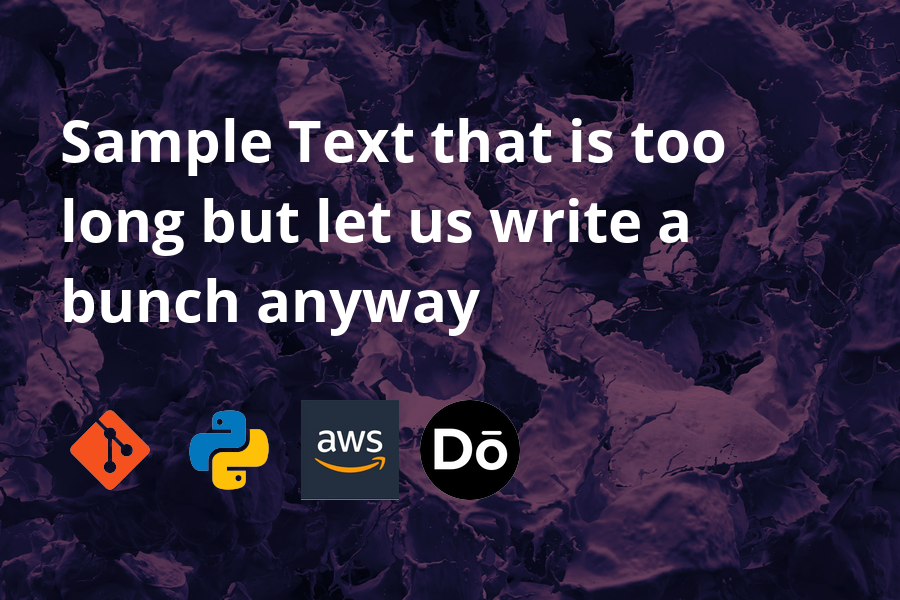

In [4]:
# Display the image inline
display(Image.open('../concat.png'))